# Import & Configuration

In [1]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.utils.tensorboard import SummaryWriter
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import warnings
# select multiline -> 'ctrl + /' -> multiline comment
# print option
torch.set_printoptions(precision=4, linewidth=50000, sci_mode=None)
# Control Warning Message
warnings.filterwarnings(action='ignore')
writer = SummaryWriter('runs')

# Preparing Data

In [4]:
dataset_dir = '~/dataset'
train_data = datasets.MNIST(root=dataset_dir, train=True,  download=True, transform=ToTensor())
test_data  = datasets.MNIST(root=dataset_dir, train=False, download=True, transform=ToTensor())
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/woong/dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
print('[Print] Type of trainData :', type(train_data))
print('[Print] Type of trainData.data :', type(train_data.data))
print('[Print] Type of trainData.targets :', type(train_data.targets))
print('[Print] Type of trainData.classes :',type(train_data.classes))

[Print] Type of trainData : <class 'torchvision.datasets.mnist.MNIST'>
[Print] Type of trainData.data : <class 'torch.Tensor'>
[Print] Type of trainData.targets : <class 'torch.Tensor'>
[Print] Type of trainData.classes : <class 'list'>


In [6]:
print(train_data.targets)
print(train_data.classes)

tensor([5, 0, 4,  ..., 5, 6, 8])
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [7]:
print(train_data.data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 2

In [8]:
print(train_data.targets[0])

tensor(5)


In [9]:
# Difference between trainData and trainData.data
# Difference between trainData is nomalized value of trainData.data
torch.set_printoptions(precision=1, linewidth=50000, sci_mode=None)
print(train_data[0])
torch.set_printoptions(precision=4, linewidth=50000, sci_mode=None)

(tensor([[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.7, 0.1, 0.7, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.6, 0.7, 1.0, 1.0, 1.0, 1.0

In [10]:
# [0][0]: 3D-image data [0][1]: Label
print(f'Image: {train_data[0][0].size()}')
print(f'Label: {train_data[0][1]}')

Image: torch.Size([1, 28, 28])
Label: 5


In [11]:
# trainData is nomalized using /255
print(f'trainData.data: {train_data.data[0][24][4]}')
print(f'trainData.data/255: {train_data.data[0][24][4]/255}')
print(f'trainData: {train_data[0][0][0][24][4]}')

trainData.data: 136
trainData.data/255: 0.5333333611488342
trainData: 0.5333333611488342


# Data Loader

In [12]:
train_dataset, valid_dataset = torch.utils.data.random_split(train_data, [50000, 10000])
print(f'trainDataset: {len(train_dataset)}')
print(f'validDataset: {len(valid_dataset)}')

batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size)
test_dataloader  = DataLoader(test_data,  batch_size=batch_size)

for imgs, labs in train_dataloader:
	print("Shape of image [N, C, H, W]: ", imgs.shape)
	print("Shape of label             : ", labs.shape, labs.dtype)
	break

trainDataset: 50000
validDataset: 10000
Shape of image [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of label             :  torch.Size([64]) torch.int64


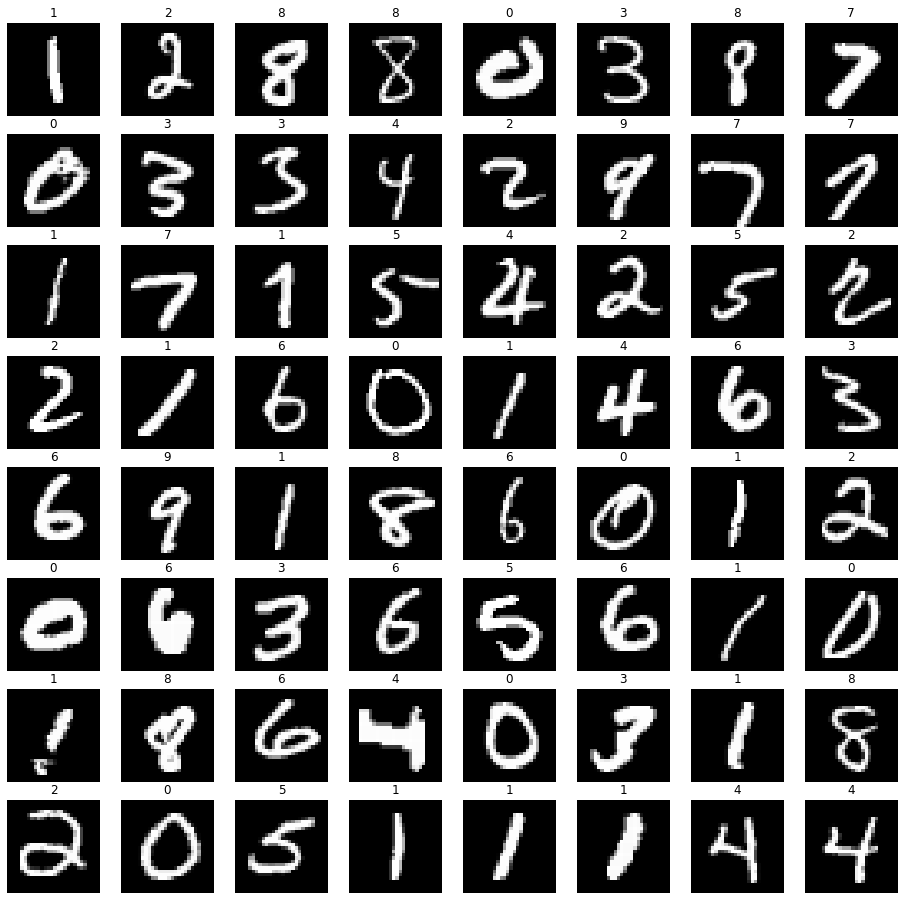

In [13]:
figure = plt.figure(figsize=(16, 16))
cols, rows = 8, 8
for i in range(cols * rows ):
	#sampleIndex = torch.randint(len(imgs), size=(1,)).item()
# 	img = imgs[sampleIndex]
# 	lab = labs[sampleIndex].item()

	img = imgs[i]
	lab = labs[i].item()
	figure.add_subplot(rows, cols, i+1)
	plt.title(lab)
	plt.axis("off")
	plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Model Build-up

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class NN(nn.Module):
	def __init__(self):
		super(NN, self).__init__()
		self.flatten = nn.Flatten()
		self.seq = nn.Sequential(
			nn.Linear(28*28, 16),
			nn.ReLU(),
			nn.Linear(16, 16),
			nn.ReLU(),
			nn.Linear(16, 10),
		)

	def forward(self, x):
		x = self.flatten(x)
		logits = self.seq(x)
		return logits
	
model = NN().to(device)
print(model)

Using cuda device
NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (seq): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=10, bias=True)
  )
)


In [15]:
for name, param in model.named_parameters(): 
	print(f'name:{name}') 
	print(type(param)) 
	print(f'param.shape:{param.shape}') 
	print(f'param.requries_grad:{param.requires_grad}') 
	print('=====')

name:seq.0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([16, 784])
param.requries_grad:True
=====
name:seq.0.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([16])
param.requries_grad:True
=====
name:seq.2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([16, 16])
param.requries_grad:True
=====
name:seq.2.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([16])
param.requries_grad:True
=====
name:seq.4.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10, 16])
param.requries_grad:True
=====
name:seq.4.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10])
param.requries_grad:True
=====


# Define Loss Function & Optimizer

In [16]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
train_loss = 0
test_loss = 0

In [17]:
def train(train_dataloader, model, loss_func, optimizer, epoch, train_loss):
	for batch_index, (img, lab) in enumerate(train_dataloader):
		img, lab = img.to(device), lab.to(device)
		pred = model(img)
		loss = loss_func(pred, lab)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		
		train_loss += loss.item()
	writer.add_scalar('trainLoss', train_loss/len(train_dataloader.dataset), epoch)
	trainLoss = 0
# 	return loss

In [18]:
def test(test_dataloader, model, epoch, test_loss):
	model.eval()
	test_loss, correct = 0, 0
	with torch.no_grad():
		for img, lab in test_dataloader:
			img, lab = img.to(device), lab.to(device)
			pred = model(img)
			test_loss += loss_func(pred, lab).item()
			correct += (pred.argmax(1) == lab).type(torch.float).sum().item()
	test_loss /= len(test_dataloader.dataset)
	correct /= len(test_dataloader.dataset)
	print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}")
	writer.add_scalar('testLoss', test_loss, epoch)
	test_loss = 0

In [19]:
model.state_dict().keys()

odict_keys(['seq.0.weight', 'seq.0.bias', 'seq.2.weight', 'seq.2.bias', 'seq.4.weight', 'seq.4.bias'])

In [20]:
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])

tensor([ 0.0146,  0.0076,  0.0118, -0.0096,  0.0286, -0.0194, -0.0228, -0.0087], device='cuda:0')
tensor([ 0.0887, -0.2437, -0.2181, -0.0347,  0.2041,  0.0074, -0.0494,  0.1883], device='cuda:0')
tensor([-0.0649, -0.1961, -0.1391,  0.1821,  0.1607, -0.0345,  0.2127, -0.0821], device='cuda:0')


# Please check in the https://www.h-schmidt.net/FloatConverter/IEEE754.html

In [21]:
model.state_dict()['seq.0.weight'][0][0]=0.3
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])

tensor([ 0.3000,  0.0076,  0.0118, -0.0096,  0.0286, -0.0194, -0.0228, -0.0087], device='cuda:0')
tensor([ 0.0887, -0.2437, -0.2181, -0.0347,  0.2041,  0.0074, -0.0494,  0.1883], device='cuda:0')
tensor([-0.0649, -0.1961, -0.1391,  0.1821,  0.1607, -0.0345,  0.2127, -0.0821], device='cuda:0')


In [22]:
epochs = 10
for epoch in range(epochs):
	print(f"Epoch {epoch+1:3d}: ", end='')
	train(train_dataloader, model, loss_func, optimizer, epoch, train_loss)
	test(valid_dataloader, model, epoch, test_loss)
print("Done!")
writer.close()

Epoch   1: Accuracy: 60.0%, Avg loss: 0.024678
Epoch   2: Accuracy: 84.2%, Avg loss: 0.009282
Epoch   3: Accuracy: 87.7%, Avg loss: 0.006947
Epoch   4: Accuracy: 88.8%, Avg loss: 0.006158
Epoch   5: Accuracy: 89.6%, Avg loss: 0.005714
Epoch   6: Accuracy: 90.0%, Avg loss: 0.005399
Epoch   7: Accuracy: 90.5%, Avg loss: 0.005145
Epoch   8: Accuracy: 90.9%, Avg loss: 0.004929
Epoch   9: Accuracy: 91.4%, Avg loss: 0.004744
Epoch  10: Accuracy: 91.7%, Avg loss: 0.004585
Done!


# Check updated weight in the 1st layer

In [23]:
torch.save(model.state_dict(), "model.pth")

In [24]:
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])

tensor([ 0.3000,  0.0076,  0.0118, -0.0096,  0.0286, -0.0194, -0.0228, -0.0087], device='cuda:0')
tensor([ 0.2838, -0.3211, -0.3041,  0.2349,  0.2524,  0.3589, -0.0044,  0.4279], device='cuda:0')
tensor([-0.4529, -0.3925, -0.2116,  0.5089,  0.0486, -0.4319,  0.4007, -0.1187], device='cuda:0')


In [25]:
model = NN().to(device)

In [26]:
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])

tensor([-0.0073, -0.0048,  0.0188, -0.0228, -0.0115, -0.0250,  0.0163, -0.0174], device='cuda:0')
tensor([ 0.1067, -0.0239, -0.1097,  0.0731,  0.0847, -0.1440,  0.1551,  0.1856], device='cuda:0')
tensor([-0.0236,  0.1363,  0.0998,  0.0847,  0.1730,  0.0362, -0.0699,  0.0246], device='cuda:0')


In [27]:
model.load_state_dict(torch.load("model.pth"))
print(model.state_dict()['seq.0.weight'][0][:8])
print(model.state_dict()['seq.2.weight'][0][:8])
print(model.state_dict()['seq.4.weight'][0][:8])

tensor([ 0.3000,  0.0076,  0.0118, -0.0096,  0.0286, -0.0194, -0.0228, -0.0087], device='cuda:0')
tensor([ 0.2838, -0.3211, -0.3041,  0.2349,  0.2524,  0.3589, -0.0044,  0.4279], device='cuda:0')
tensor([-0.4529, -0.3925, -0.2116,  0.5089,  0.0486, -0.4319,  0.4007, -0.1187], device='cuda:0')


In [28]:
model.state_dict()['seq.0.weight']

tensor([[ 0.3000,  0.0076,  0.0118,  ..., -0.0023,  0.0231,  0.0339],
        [-0.0122,  0.0045,  0.0076,  ..., -0.0176, -0.0060, -0.0180],
        [ 0.0043,  0.0169, -0.0162,  ...,  0.0236,  0.0087,  0.0058],
        ...,
        [ 0.0314, -0.0173, -0.0254,  ..., -0.0011, -0.0331,  0.0010],
        [ 0.0202, -0.0089,  0.0202,  ...,  0.0128, -0.0238,  0.0319],
        [ 0.0072,  0.0258,  0.0239,  ...,  0.0152,  0.0289,  0.0034]], device='cuda:0')

In [29]:
torch.flatten(model.state_dict()['seq.0.weight']).to('cpu').numpy()

array([0.3       , 0.00759176, 0.01183272, ..., 0.01517199, 0.02892498,
       0.00341664], dtype=float32)